In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import pickle
import datetime
import os
import seaborn as sns
from sklearn.preprocessing import *

%matplotlib inline


from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

In [2]:
xtrain = pd.read_csv("Airbnb_xtrain_v1.csv",index_col=0)

In [3]:
ytrain = pd.read_csv("Airbnb_ytrain_v1.csv", header=None)

In [4]:
xtrain.head()

,tfa_year,tfa_month,tfa_day,tfa_wd_1,tfa_wd_2,tfa_wd_3,tfa_wd_4,tfa_wd_5,tfa_wd_6,tfa_wd_7,...,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser,first_browser_nan
0,2009,3,19,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2009,5,23,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2009,6,9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009,10,31,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2009,12,8,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
ytrain.head(10)

,0
0,NDF
1,NDF
2,US
3,other
4,US
5,US
6,US
7,US
8,US
9,US


In [6]:
#类别
np.unique(ytrain.values)

array(['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT', 'US',
       'other'], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ytrain_le = le.fit_transform(ytrain.values)

D:\Users\LPZ\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
ytrain_le.shape

(213451,)

In [6]:
ytrain_le

array([ 7,  7, 10, ...,  7,  7,  7], dtype=int64)

In [7]:
# Let us take 10% of the data for faster training. 
n = int(xtrain.shape[0]*0.1)
print (n)
xtrain_new = xtrain.iloc[:n, :]
ytrain_new = ytrain_le[:n]

21345


In [8]:
print (xtrain_new.shape)
print (ytrain_new.shape)

(21345, 203)
(21345,)


# StandardScaling the dataset

In [9]:
#Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).
#For instance many elements used in the objective function of a learning algorithm 
#(such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) 
#assume that all features are centered around 0 and have variance in the same order. 
#If a feature has a variance that is orders of magnitude larger that others, 
#it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

X_scaler = StandardScaler()

xtrain_new = X_scaler.fit_transform(xtrain_new)

In [10]:
xtrain_new

array([[-3.39515182, -0.89254222,  0.41158123, ...,  0.        ,
         0.        ,  0.        ],
       [-3.39515182, -0.33436011,  0.87008708, ...,  0.        ,
         0.        ,  0.        ],
       [-3.39515182, -0.05526905, -0.7346834 , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 1.26706612, -0.61345116, -0.04692462, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.26706612, -0.61345116, -0.04692462, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.26706612, -0.61345116, -0.04692462, ...,  0.        ,
         0.        ,  0.        ]])

In [11]:
np.argsort?

# Airbnb Evaluation: NDCG

In [12]:
x = np.array([1.48,1.41,0.0,0.1])
#argsort：从小到大排序，返回各元素对应的下标
#[::-1]：颠倒顺序
#本条语句实际返回从大到小排序的下标
order = np.argsort(x)[::-1]

In [13]:
order

array([0, 1, 3, 2], dtype=int64)

In [14]:
len(order)

4

In [15]:
lb = LabelBinarizer()
lb.fit(range(11))
#T = lb.transform(ground_truth)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [16]:
ground_truth=[1,0,2,2,3,12,1,0,6,7]

In [17]:
T = lb.transform(ground_truth)

In [18]:
T

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [19]:
# From Kaggle Kernels

from sklearn.metrics import make_scorer

def dcg_score(y_true, y_score, k=5):
    
    """
    y_true : array, shape = [n_samples]
        Ground truth (true relevance labels).
    y_score : array, shape = [n_samples, n_classes]
        Predicted scores.
    k : int
    """
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])
    
    
    #order = [3,2,1,7]
    #y_true = [0,1,0,0]
    #y_true =[0,0,1,0]
    
    

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)
    # 0 doesn't count =>>>> only reduce 1 


def ndcg_score(ground_truth, predictions, k=5):
    
    """
    Parameters
    ----------
    ground_truth : array, shape = [n_samples]
        Ground truth (true labels represended as integers).
    predictions : array, shape = [n_samples, n_classes]
        Predicted probabilities.
    k : int
        Rank.
        
    Example
    -------
    >>> ground_truth = [1, 0, 2]
    transform:只有最大值为1，即预测值对score即为1，预测不对score为0
    [[0,1,0],[1,0,0],[0,0,1]]
    >>> predictions = [[0.15, 0.55, 0.2], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    只考虑最大值位置，此预测即为：[[0,1,0],[1,0,0],[0,0,1]]
    argsort:排序索引
    pre：[[0,2,1],[2,1,0],[1,0,2]]
    true：[[0,2,1],[1,2,0],[0,1,2]]
    
    order:
    pre:[[1,2,0],[0,1,2],[2,0,1]]
    true：[[1,2,0],[0,1,2],[2,1,0]]
    
    take：按索引取值
    y_true: k=2
    pre:[[1,0],[1,0],[1,0]]
    true:[[1,0],[1,0],[1,0]]
    
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    1.0
    >>> predictions = [[0.9, 0.5, 0.8], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    只考虑最大值位置，此预测即为：[[1,0,0],[1,0,0],[0,0,1]]，预测对了1/3
    [0.9, 0.5, 0.8]->argsort
    [1,2,0]->[::-1]
    [0,2,1]->take
    [0,0]->score
    0
    若为：[0.9, 0.5, 0.4]
    [0.9, 0.5, 0.4]->argsort
    [2,1,0]->[::-1]
    [0,1,2]->take
    [0,1]->score
    非零
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    0.6666666666
    """
    lb = LabelBinarizer()
    #modified by lpz 20180125
    #lb.fit(range(len(predictions) + 1))
    lb.fit(range(len(np.unique(ground_truth)))
    T = lb.transform(ground_truth)
    
    #ground_truth = [1, 0, 2]  =>>>> 
    #ground_truth : [[0, 1, 0],       [1, 0, 0],    [0, 0, 1]]
    #predictions: [[0.15, 0.55, 0.2], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    #zip =>>> take one vector from each batch

    scores = []

    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 1.0, penalty='l2', multi_class='ovr')
print (lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [24]:
LogisticRegression?

In [25]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [26]:
'''
random_state:随机种子数
设置后：每次运行结果相同
不设置：从系统时间取，每次结果不同
KFOLD中有shuffle参数：是否在划分时进行洗牌
False：不洗牌，运行结果相同
True：洗牌，运行结果不同
True+设置random_state：运行结果相同
'''
RANDOM_STATE = 2017
#K折交叉验证
kf = KFold(n_splits=5, random_state=RANDOM_STATE)

In [27]:
#y_train

In [28]:
train_score = []
cv_score = []

# select a k  (value how many y):
k_ndcg = 3

for train_index, test_index in kf.split(xtrain_new, ytrain_new):
    
    X_train, X_test = xtrain_new[train_index, :], xtrain_new[test_index, :]
    y_train, y_test = ytrain_new[train_index], ytrain_new[test_index]
    
    print (X_train.shape, X_test.shape)
    
    

(17076, 203) (4269, 203)
(17076, 203) (4269, 203)
(17076, 203) (4269, 203)
(17076, 203) (4269, 203)
(17076, 203) (4269, 203)


In [29]:
lr.fit(X_train, y_train)

#predict_proba:返回预测每个分类的概率，每组数据结果为一个概率序列
#predict:返回预测结果，每组数据预测结果为一个
y_pred = lr.predict_proba(X_test)
    
    # for binary classification: we used to use f1 score, precision, recall, auc score.
    # here for Airbnb we use the ndcg evaluation. 
    
train_ndcg_score = ndcg_score(y_train, lr.predict_proba(X_train), k = k_ndcg)
cv_ndcg_score = ndcg_score(y_test, y_pred, k=k_ndcg)
    
train_score.append(train_ndcg_score)
cv_score.append(cv_ndcg_score)
    
print ("\nThe training score is: {}".format(np.mean(train_score)))
print ("\nThe cv score is: {}".format(np.mean(cv_score)))


The training score is: 0.7619922521439951

The cv score is: 0.7453253858205418


In [30]:
cv_score_lr = 0.744

# learning curve of logistic regression

# 1. Changing iteration

In [31]:
# set the iterations

iteration = [1,5,10,15,20, 50, 100]

kf = KFold(n_splits=3, random_state=RANDOM_STATE)

train_score = []
cv_score = []

# select a k:
k_ndcg = 5

for i, item in enumerate(iteration):
    
    print ('{} iterations:'.format(item))
    
    lr = LogisticRegression(C=1.0, max_iter=item, tol=1e-5, solver='newton-cg', multi_class='ovr')
    #print coefficients   
    print (lr)
    
    train_score_iter = []
    cv_score_iter = []

    for train_index, test_index in kf.split(xtrain_new, ytrain_new):

        X_train, X_test = xtrain_new[train_index, :], xtrain_new[test_index, :]
        y_train, y_test = ytrain_new[train_index], ytrain_new[test_index]

        print (X_train.shape, X_test.shape)
        
        lr.fit(X_train, y_train)

        y_pred = lr.predict_proba(X_test)

        # for binary classification: we used to use f1 score, precision, recall, auc score.
        # here for Airbnb we use the ndcg evaluation. 

        train_ndcg_score = ndcg_score(y_train, lr.predict_proba(X_train), k = k_ndcg)
        cv_ndcg_score = ndcg_score(y_test, y_pred, k=k_ndcg)

        
        train_score_iter.append(train_ndcg_score)
        cv_score_iter.append(cv_ndcg_score)
        
    train_score.append(np.mean(train_score_iter))
    cv_score.append(np.mean(cv_score_iter))
    
    print ("\nThe training score is: {}".format(np.mean(train_score_iter)))
    print ("The cv score is: {}\n".format(np.mean(cv_score_iter)))

1 iterations:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-05,
          verbose=0, warm_start=False)
(14230, 203) (7115, 203)


D:\Users\LPZ\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


(14230, 203) (7115, 203)
(14230, 203) (7115, 203)

The training score is: 0.7527319516245292
The cv score is: 0.3032297661004591

5 iterations:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-05,
          verbose=0, warm_start=False)
(14230, 203) (7115, 203)


D:\Users\LPZ\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


(14230, 203) (7115, 203)
(14230, 203) (7115, 203)

The training score is: 0.784211430059762
The cv score is: 0.5581244857516953

10 iterations:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-05,
          verbose=0, warm_start=False)
(14230, 203) (7115, 203)


D:\Users\LPZ\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


(14230, 203) (7115, 203)
(14230, 203) (7115, 203)

The training score is: 0.7852125450197911
The cv score is: 0.7544977572320333

15 iterations:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=15, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-05,
          verbose=0, warm_start=False)
(14230, 203) (7115, 203)


D:\Users\LPZ\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


(14230, 203) (7115, 203)
(14230, 203) (7115, 203)

The training score is: 0.785190811902928
The cv score is: 0.7631706110093397

20 iterations:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-05,
          verbose=0, warm_start=False)
(14230, 203) (7115, 203)


D:\Users\LPZ\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


(14230, 203) (7115, 203)
(14230, 203) (7115, 203)

The training score is: 0.7851897853451666
The cv score is: 0.7631628374205958

50 iterations:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-05,
          verbose=0, warm_start=False)
(14230, 203) (7115, 203)
(14230, 203) (7115, 203)
(14230, 203) (7115, 203)

The training score is: 0.7851897853451666
The cv score is: 0.7631628374205958

100 iterations:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-05,
          verbose=0, warm_start=False)
(14230, 203) (7115, 203)
(14230, 203) (7115, 203)
(14230, 203) (7115, 203)

The training score is: 0.7851897853451666
The cv score is: 0.7631628374205958



In [32]:
y_train

array([ 7,  7, 10, ...,  9, 10,  7], dtype=int64)

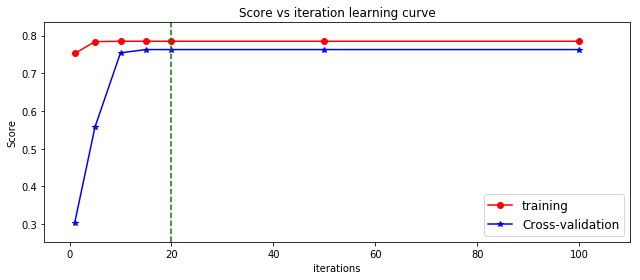

In [33]:
ymin = np.min(cv_score)-0.05
ymax = np.max(train_score)+0.05

plt.figure(figsize=(9,4))
plt.plot(iteration, train_score, 'ro-', label = 'training')
plt.plot(iteration, cv_score, 'b*-', label = 'Cross-validation')
plt.xlabel("iterations")
plt.ylabel("Score")
plt.xlim(-5, np.max(iteration)+10)
plt.ylim(ymin, ymax)
plt.plot(np.linspace(20,20,50), np.linspace(ymin, ymax, 50), 'g--')
plt.legend(loc = 'lower right', fontsize = 12)
plt.title("Score vs iteration learning curve")

plt.tight_layout()

# 2. Varying data size

In [34]:
# Chaning the sampling size
# set the iter to the best iteration: iter = 20

perc = [0.01,0.02,0.05,0.1,0.2,0.5,1]

kf = KFold(n_splits=3, random_state=RANDOM_STATE)

train_score = []
cv_score = []

# select a k:
k_ndcg = 5

for i, item in enumerate(perc):
    
    print ('{}% of the data'.format(int(item*100)))
    
    lr = LogisticRegression(C=1.0, max_iter=20, tol=1e-6, solver='newton-cg', multi_class='ovr')
        
    print (lr)
    
    train_score_iter = []
    cv_score_iter = []
    
    n = int(xtrain_new.shape[0]*item)
    xtrain_perc = xtrain_new[:n, :]
    ytrain_perc = ytrain_new[:n]


    for train_index, test_index in kf.split(xtrain_perc, ytrain_perc):
        
        X_train, X_test = xtrain_perc[train_index, :], xtrain_perc[test_index, :]
        y_train, y_test = ytrain_perc[train_index], ytrain_perc[test_index]

        print (X_train.shape, X_test.shape)
        
        lr.fit(X_train, y_train)

        y_pred = lr.predict_proba(X_test)

        # for binary classification: we used to use f1 score, precision, recall, auc score.
        # here for Airbnb we use the ndcg evaluation. 

        train_ndcg_score = ndcg_score(y_train, lr.predict_proba(X_train), k = k_ndcg)
        cv_ndcg_score = ndcg_score(y_test, y_pred, k=k_ndcg)

        train_score_iter.append(train_ndcg_score)
        cv_score_iter.append(cv_ndcg_score)
        
    train_score.append(np.mean(train_score_iter))
    cv_score.append(np.mean(cv_score_iter))
    
    print ("\nThe training score is: {}".format(np.mean(train_score_iter)))
    print ("The cv score is: {}\n".format(np.mean(cv_score_iter)))

1% of the data
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-06,
          verbose=0, warm_start=False)
(142, 203) (71, 203)
(142, 203) (71, 203)
(142, 203) (71, 203)

The training score is: 0.1392511300160372
The cv score is: 0.11042568232196943

2% of the data
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-06,
          verbose=0, warm_start=False)
(284, 203) (142, 203)


D:\Users\LPZ\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


(284, 203) (142, 203)
(284, 203) (142, 203)

The training score is: 0.2514796735062003
The cv score is: 0.2729632790948306

5% of the data
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-06,
          verbose=0, warm_start=False)
(711, 203) (356, 203)


D:\Users\LPZ\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


(711, 203) (356, 203)
(712, 203) (355, 203)

The training score is: 0.3772332849028106
The cv score is: 0.31187519051555307

10% of the data
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-06,
          verbose=0, warm_start=False)
(1422, 203) (712, 203)


D:\Users\LPZ\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


(1423, 203) (711, 203)
(1423, 203) (711, 203)

The training score is: 0.7255201026766009
The cv score is: 0.6506309149530095

20% of the data
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-06,
          verbose=0, warm_start=False)
(2846, 203) (1423, 203)


D:\Users\LPZ\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


(2846, 203) (1423, 203)
(2846, 203) (1423, 203)

The training score is: 0.7979551257911561
The cv score is: 0.7559289011699967

50% of the data
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-06,
          verbose=0, warm_start=False)
(7114, 203) (3558, 203)


D:\Users\LPZ\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


(7115, 203) (3557, 203)
(7115, 203) (3557, 203)

The training score is: 0.7831146620136273
The cv score is: 0.7356716313981941

100% of the data
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-06,
          verbose=0, warm_start=False)
(14230, 203) (7115, 203)


D:\Users\LPZ\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


(14230, 203) (7115, 203)
(14230, 203) (7115, 203)

The training score is: 0.7851897853451666
The cv score is: 0.7631628374205958



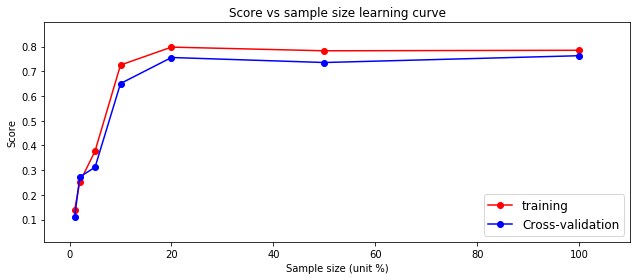

In [35]:
ymin = np.min(cv_score)-0.1
ymax = np.max(train_score)+0.1

plt.figure(figsize=(9,4))
plt.plot(np.array(perc)*100, train_score, 'ro-', label = 'training')
plt.plot(np.array(perc)*100, cv_score, 'bo-', label = 'Cross-validation')
plt.xlabel("Sample size (unit %)")
plt.ylabel("Score")
plt.xlim(-5, np.max(perc)*100+10)
plt.ylim(ymin, ymax)

plt.legend(loc = 'lower right', fontsize = 12)
plt.title("Score vs sample size learning curve")

plt.tight_layout()

In [36]:
# from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import *
from sklearn.svm import SVC, LinearSVC, NuSVC

# Tree method

In [37]:
LEARNING_RATE = 0.1
N_ESTIMATORS = 50
RANDOM_STATE = 2017
MAX_DEPTH = 9
#DecisionTree Bagging Boosting
#Boosting算法：损失函数不同，算法名称不同
clf_tree ={
    'DTree': DecisionTreeClassifier(max_depth=MAX_DEPTH,
                                    random_state=RANDOM_STATE),
    #随机选取部分样本（参数可选），划分时features随机选取部分
    'RF': RandomForestClassifier(n_estimators=N_ESTIMATORS,
                                 max_depth=MAX_DEPTH,
                                 random_state=RANDOM_STATE),
    
    'AdaBoost': AdaBoostClassifier(n_estimators=N_ESTIMATORS,
                                   learning_rate=LEARNING_RATE,
                                   random_state=RANDOM_STATE),
    #随机选取部分样本，features在全部里选最优
    'Bagging': BaggingClassifier(n_estimators=N_ESTIMATORS,
                                 random_state=RANDOM_STATE),
    #默认使用所有样本，但划分时features随机选取部分
    'ExtraTree': ExtraTreesClassifier(max_depth=MAX_DEPTH,
                                      n_estimators=N_ESTIMATORS,
                                      random_state=RANDOM_STATE),
    #梯度提升树
    'GraBoost': GradientBoostingClassifier(learning_rate=LEARNING_RATE,
                                           max_depth=MAX_DEPTH,
                                           n_estimators=N_ESTIMATORS,
                                           random_state=RANDOM_STATE)
}

In [38]:
for key in clf_tree.keys():
    
    print (clf_tree.get(key))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2017,
            splitter='best')
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=2017, verbose=0,
            warm_start=False)
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=50, random_state=2017)
BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, m

In [39]:
train_score = []
cv_score = []

kf = KFold(n_splits=3, random_state=RANDOM_STATE)

k_ndcg = 5

for key in clf_tree.keys():
    
    clf = clf_tree.get(key)
    print (clf)
    
    train_score_iter = []
    cv_score_iter = []

    for train_index, test_index in kf.split(xtrain_new, ytrain_new):

        X_train, X_test = xtrain_new[train_index, :], xtrain_new[test_index, :]
        y_train, y_test = ytrain_new[train_index], ytrain_new[test_index]

        print (X_train.shape, X_test.shape)
        
        clf.fit(X_train, y_train)

        y_pred = clf.predict_proba(X_test)

        # for binary classification: we used to use f1 score, precision, recall, auc score.
        # here for Airbnb we use the ndcg evaluation. 

        train_ndcg_score = ndcg_score(y_train, clf.predict_proba(X_train), k = k_ndcg)
        cv_ndcg_score = ndcg_score(y_test, y_pred, k=k_ndcg)

        train_score_iter.append(train_ndcg_score)
        cv_score_iter.append(cv_ndcg_score)
        
    train_score.append(np.mean(train_score_iter))
    cv_score.append(np.mean(cv_score_iter))
    
    print ("\nThe training score is: {}".format(np.mean(train_score_iter)))
    print ("The cv score is: {}\n".format(np.mean(cv_score_iter)))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2017,
            splitter='best')
(14230, 203) (7115, 203)
(14230, 203) (7115, 203)
(14230, 203) (7115, 203)

The training score is: 0.8036065670636977
The cv score is: 0.7463964600394104

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=2017, verbose=0,
            warm_start=False)
(14230, 203) (7115, 203)
(14230, 203) (7115, 203)
(14230, 203) (7115, 203)

The 

In [40]:
train_score_tree = train_score
cv_score_tree = cv_score

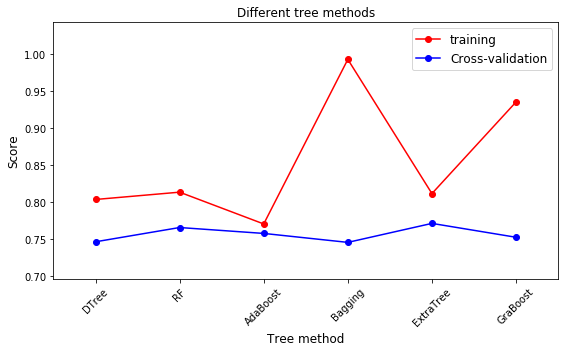

In [41]:
#各模型对比
#分别比较训练集和交叉验证分数
#训练集ndcg分数较交叉验证高很多，说明该算法容易过拟合
ymin = np.min(cv_score)-0.05
ymax = np.max(train_score)+0.05

x_ticks = clf_tree.keys()

plt.figure(figsize=(8,5))
plt.plot(range(len(x_ticks)), train_score_tree, 'ro-', label = 'training')
plt.plot(range(len(x_ticks)),cv_score_tree, 'bo-', label = 'Cross-validation')

plt.xticks(range(len(x_ticks)),x_ticks,rotation = 45, fontsize = 10)
plt.xlabel("Tree method", fontsize = 12)
plt.ylabel("Score", fontsize = 12)
plt.xlim(-0.5, 5.5)
plt.ylim(ymin, ymax)

plt.legend(loc = 'best', fontsize = 12)
plt.title("Different tree methods")

plt.tight_layout()

# RandomForestClassifier

In [42]:
# estimator numbers:

#num_estimators = [10, 50, 100, 200, 500, 1000]
num_estimators = 10 + np.arange(10)*20

train_score_rf = []
cv_score_rf = []

X_train, X_test, y_train, y_test = train_test_split(xtrain_new, ytrain_new, test_size=0.2, 
                                                    random_state=RANDOM_STATE)

k_ndcg = 5

for item in num_estimators:
    
    print ("the num of estimator in RF is:{}".format(item))
    
    clf = RandomForestClassifier(n_estimators=item, 
                                 random_state=RANDOM_STATE, 
                                 max_depth=MAX_DEPTH)
    print (clf)

        
    clf.fit(X_train, y_train)

    y_pred = clf.predict_proba(X_test)

    # for binary classification: we used to use f1 score, precision, recall, auc score.
    # here for Airbnb we use the ndcg evaluation. 

    train_ndcg_score = ndcg_score(y_train, clf.predict_proba(X_train), k = k_ndcg)
    cv_ndcg_score = ndcg_score(y_test, y_pred, k=k_ndcg)

    train_score_rf.append(train_ndcg_score)
    cv_score_rf.append(cv_ndcg_score)
    
    print ("\nThe training score is: {}".format(train_ndcg_score))
    print ("The cv score is: {}\n".format(cv_ndcg_score))

the num of estimator in RF is:10
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2017, verbose=0,
            warm_start=False)

The training score is: 0.8008304718050544
The cv score is: 0.7850001277168923

the num of estimator in RF is:30
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=2017, verbose=0,
            warm_start=False)

The training scor

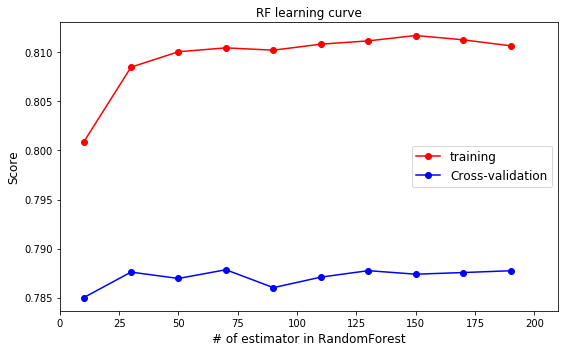

In [43]:
#决策树深度，决定是否会过拟合
plt.figure(figsize=(8,5))
plt.plot(num_estimators, train_score_rf, 'ro-', label = 'training')
plt.plot(num_estimators,cv_score_rf, 'bo-', label = 'Cross-validation')

plt.xlabel("# of estimator in RandomForest", fontsize = 12)
plt.ylabel("Score", fontsize = 12)
plt.xlim(0, np.max(num_estimators)+20)


plt.legend(loc = 'best', fontsize = 12)
plt.title("RF learning curve")

plt.tight_layout()

In [44]:
#  play with other parameters

# SVM

In [45]:
TOL = 1e-4
MAX_ITER = 1000

#kernel:核函数支持向量机
#poly：多项式核函数
#rbf：高斯核函数/径向基核函数 default
#linear：线性核函数
#LinearSVC：线性分类
clf_svm = {
    
    'SVM-rbf': SVC(kernel='rbf',
                   max_iter=MAX_ITER,
                   tol=TOL, random_state=RANDOM_STATE,
                   decision_function_shape='ovr'),     # solver : libsvm
    
    'SVM-poly': SVC(kernel='poly',
                   max_iter=MAX_ITER,
                   tol=TOL, random_state=RANDOM_STATE,
                   decision_function_shape='ovr'),      # solver : libsvm
    
    'SVM-linear': SVC(kernel='linear',
                      max_iter=MAX_ITER,
                      tol=TOL, 
                      random_state=RANDOM_STATE,
                      decision_function_shape='ovr'),   # solver : libsvm
    
    'LinearSVC': LinearSVC(max_iter=MAX_ITER,
                            tol=TOL,
                            random_state=RANDOM_STATE,
                            multi_class = 'ovr')        # solver: liblinear
}

In [46]:
for key in clf_svm.keys():
    
    print (clf_svm.get(key))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=1000, probability=False, random_state=2017, shrinking=True,
  tol=0.0001, verbose=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=1000, probability=False, random_state=2017, shrinking=True,
  tol=0.0001, verbose=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=1000, probability=False, random_state=2017, shrinking=True,
  tol=0.0001, verbose=False)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=2017, tol=0.0001,
     verbose=0)


In [47]:
train_score_svm = []
cv_score_svm = []

kf = KFold(n_splits=3, random_state=RANDOM_STATE)

k_ndcg = 5

for key in clf_svm.keys():
    
    clf = clf_svm.get(key)
    print (clf)
    
    train_score_iter = []
    cv_score_iter = []

    for train_index, test_index in kf.split(xtrain_new, ytrain_new):

        X_train, X_test = xtrain_new[train_index, :], xtrain_new[test_index, :]
        y_train, y_test = ytrain_new[train_index], ytrain_new[test_index]

        print (X_train.shape, X_test.shape)
        
        clf.fit(X_train, y_train)

        y_pred = clf.decision_function(X_test)

        # for binary classification: we used to use f1 score, precision, recall, auc score.
        # here for Airbnb we use the ndcg evaluation. 

        train_ndcg_score = ndcg_score(y_train, clf.decision_function(X_train), k = k_ndcg)
        cv_ndcg_score = ndcg_score(y_test, y_pred, k=k_ndcg)

        train_score_iter.append(train_ndcg_score)
        cv_score_iter.append(cv_ndcg_score)
        
    train_score_svm.append(np.mean(train_score_iter))
    cv_score_svm.append(np.mean(cv_score_iter))
    
    print ("\nThe training score is: {}".format(np.mean(train_score_iter)))
    print ("The cv score is: {}\n".format(np.mean(cv_score_iter)))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=1000, probability=False, random_state=2017, shrinking=True,
  tol=0.0001, verbose=False)
(14230, 203) (7115, 203)


D:\Users\LPZ\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


(14230, 203) (7115, 203)
(14230, 203) (7115, 203)

The training score is: 0.7560392854808665
The cv score is: 0.7409305288437175

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=1000, probability=False, random_state=2017, shrinking=True,
  tol=0.0001, verbose=False)
(14230, 203) (7115, 203)


D:\Users\LPZ\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


(14230, 203) (7115, 203)
(14230, 203) (7115, 203)

The training score is: 0.7289159353615803
The cv score is: 0.7164347388076795

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=1000, probability=False, random_state=2017, shrinking=True,
  tol=0.0001, verbose=False)
(14230, 203) (7115, 203)


D:\Users\LPZ\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


(14230, 203) (7115, 203)
(14230, 203) (7115, 203)

The training score is: 0.6604176857195813
The cv score is: 0.6124031409833334

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=2017, tol=0.0001,
     verbose=0)
(14230, 203) (7115, 203)
(14230, 203) (7115, 203)
(14230, 203) (7115, 203)

The training score is: 0.7832963387488192
The cv score is: 0.7519724782173011



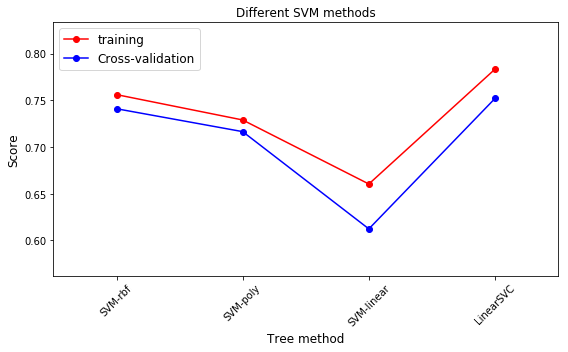

In [48]:
ymin = np.min(cv_score_svm)-0.05
ymax = np.max(train_score_svm)+0.05

x_ticks = clf_svm.keys()

plt.figure(figsize=(8,5))
plt.plot(range(len(x_ticks)), train_score_svm, 'ro-', label = 'training')
plt.plot(range(len(x_ticks)),cv_score_svm, 'bo-', label = 'Cross-validation')

plt.xticks(range(len(x_ticks)),x_ticks,rotation = 45, fontsize = 10)
plt.xlabel("Tree method", fontsize = 12)
plt.ylabel("Score", fontsize = 12)
plt.xlim(-0.5, 3.5)
plt.ylim(ymin, ymax)

plt.legend(loc = 'best', fontsize = 12)
plt.title("Different SVM methods")

plt.tight_layout()

# xgboost

In [20]:
#从GBDT发展而来
import xgboost as xgb

In [21]:
#实际该函数是用ndcg方法进行预测
def customized_eval(preds, dtrain):#preds是结果（概率值），dtrain是个带label的DMatrix
    #labels为一列数据，没有进行one-hot-encoding
    labels = dtrain.get_label()
    top = []
    for i in range(preds.shape[0]):
        #每组预测概率进行与dcg中相同操作
        top.append(np.argsort(preds[i])[::-1][:5])
    #repeat：重复一个数组的元素
    #==判断各列预测是否与实际相等，相等的为1，其余为0,
    #ravel：返回一份视图，类似于引用
    mat = np.reshape(np.repeat(labels,np.shape(top)[1]) == np.array(top).ravel(),np.array(top).shape).astype(int)
    #计算ndcg的score，预测正确的score为1，所以直接计算出的即为ndcg的score
    score = np.mean(np.sum(mat/np.log2(np.arange(2, mat.shape[1] + 2)),axis = 1))
    return 'ndcg5', score

In [23]:
# xgboost parameters
#分类器数量
NUM_XGB = 200
RANDOM_STATE = 2017
params = {}
#列采样，对每棵树的生成用的特征进行列采样.一般设置为： 0.5-1
params['colsample_bytree'] = 0.6
#每颗树的最大深度，树高越深，越容易过拟合。 
params['max_depth'] = 6
#样本随机采样，较低的值使得算法更加保守，防止过拟合，但是太小的值也会造成欠拟合。 
params['subsample'] = 0.8
#shrinkage参数，用于更新叶子节点权重时，乘以该系数，避免步长过大。
#参数值越大，越可能无法收敛。把学习率 eta 设置的小一些，小学习率可以使得后面的学习更加仔细。 
params['eta'] = 0.3
#随机种子，用于产生可复现的结果 
params['seed'] = RANDOM_STATE
#分类数
params['num_class'] = 12
#定义最小化损失函数类型，常用：
#binary:logistic：二分类，用logistic
#multi:softmax：用于多分类
#multi:softprob：与softmax相同，但返回预测概率序列
params['objective'] = 'multi:softprob'   # output the probability instead of class. 

print (params)

{'colsample_bytree': 0.6, 'max_depth': 6, 'subsample': 0.8, 'eta': 0.3, 'seed': 2017, 'num_class': 12, 'objective': 'multi:softprob'}


In [24]:
train_score_iter = []
cv_score_iter = []

kf = KFold(n_splits = 3, random_state=RANDOM_STATE)

k_ndcg = 5


for train_index, test_index in kf.split(xtrain_new, ytrain_new):

    X_train, X_test = xtrain_new[train_index, :], xtrain_new[test_index, :]
    y_train, y_test = ytrain_new[train_index], ytrain_new[test_index]

    print (X_train.shape, X_test.shape)
    
    #使用xgboost
    train_xgb = xgb.DMatrix(X_train, label= y_train)
    test_xgb = xgb.DMatrix(X_test, label = y_test)
    #查看list，会把每组值放到feval的函数中进行评估
    watchlist = [ (train_xgb,'train'), (test_xgb, 'test') ]
    
    #train
    bst = xgb.train(params, 
                     train_xgb,
                     NUM_XGB,
                     watchlist,
                    #定制评测函数
                     feval = customized_eval,
                    #评测结果输出步数
                     verbose_eval = 1,
                    #几轮迭代评测不增加，提前结束
                     early_stopping_rounds = 5)
    
    #报错所以注释掉该行
    #bst = xgb.train( plst, dtrain, num_round, evallist )

    y_pred = np.array(bst.predict(test_xgb))
    y_pred_train = np.array(bst.predict(train_xgb))
    
    # for binary classification: we used to use f1 score, precision, recall, auc score.
    # here for Airbnb we use the ndcg evaluation. 

    train_ndcg_score = ndcg_score(y_train, y_pred_train , k = k_ndcg)
    cv_ndcg_score = ndcg_score(y_test, y_pred, k=k_ndcg)

    print ("\nThe training score is: {}".format(train_ndcg_score))
    print ("The cv score is: {}\n".format(cv_ndcg_score))
    
    train_score_iter.append(train_ndcg_score)
    cv_score_iter.append(cv_ndcg_score)

train_score_xgb = np.mean(train_score_iter)
cv_score_xgb = np.mean(cv_score_iter)

print ("\nThe training score is: {}".format(train_score_xgb))
print ("The cv score is: {}\n".format(cv_score_xgb))

#merror：多分类误差率，与ndcg方法评估不同

(14230, 203) (7115, 203)
[0]	train-merror:0.427829	test-merror:0.498946	train-ndcg5:0.794574	test-ndcg5:0.747069
Multiple eval metrics have been passed: 'test-ndcg5' will be used for early stopping.

Will train until test-ndcg5 hasn't improved in 5 rounds.
[1]	train-merror:0.42059	test-merror:0.498243	train-ndcg5:0.800464	test-ndcg5:0.748685
[2]	train-merror:0.41539	test-merror:0.492481	train-ndcg5:0.804755	test-ndcg5:0.752603
[3]	train-merror:0.41286	test-merror:0.491918	train-ndcg5:0.806844	test-ndcg5:0.753189
[4]	train-merror:0.411806	test-merror:0.488405	train-ndcg5:0.807783	test-ndcg5:0.75464
[5]	train-merror:0.409206	test-merror:0.488826	train-ndcg5:0.808943	test-ndcg5:0.754755
Stopping. Best iteration:
[0]	train-merror:0.427829	test-merror:0.498946	train-ndcg5:0.794574	test-ndcg5:0.747069


The training score is: 0.8089427448752902
The cv score is: 0.7547554323839879

(14230, 203) (7115, 203)
[0]	train-merror:0.464933	test-merror:0.460014	train-ndcg5:0.77494	test-ndcg5:0.781075


# Model comparison

In [74]:
model_cvscore = np.hstack((cv_score_lr, cv_score_tree, cv_score_svm, cv_score_xgb))
#加入list将dict_keys转换为列表，否则会在后续画图中报错
model_name = np.hstack(('LinearReg', list(clf_tree.keys()),list(clf_svm.keys()), 'Xgboost'))


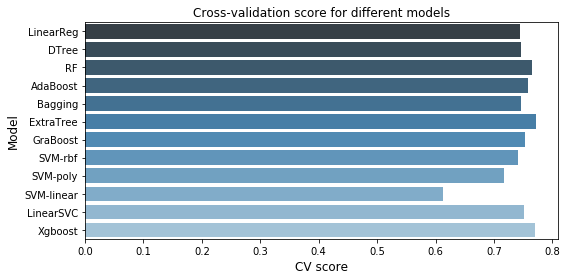

In [75]:
fig = plt.figure(figsize=(8,4))

sns.barplot(model_cvscore, model_name, palette='Blues_d')

plt.xticks(rotation=0, size = 10)
plt.xlabel("CV score", fontsize = 12)
plt.ylabel("Model", fontsize = 12)
plt.title("Cross-validation score for different models")

plt.tight_layout()

# Conclusion and tips:

1. Further parameters tuning is needed
2. Have not included session dataset information.
3. More feature engineering can be done to improve
4. Only 10% of original dataset is included here. By performing on the whole dataset would expect to have better
   performance.
5. Model ensemble. 